# CS-E-106: Data Modeling
## Fall 2019: HW 01

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns

**Solution 1 & 2:** 1 is just a hand derivation. 2's dataset is within R's library and it only requires basic summary statistics and scatterplots (`sns.pairplot()`).

**Solution 3:**

In [40]:
def reg_loop(df, x_cols, y_col):
    lm_regs = dict()
    for i in range(len(x_cols)):
        x_str = x_cols[i]
        X = sm.add_constant(df[x_cols[i]])
        lm_regs[i] = sm.OLS(df[y_col], X).fit()
        print("\n Linear Regression Summary:%s" %x_cols[i])
        print(lm_regs[i].summary())
    return(lm_regs)

In [41]:
cdi = pd.read_csv("data/cdi.csv")
x_cols = ["Total population", "Number of hospital beds", "Total personal income"]
y_col = ["Number of active physicians"]
lm_fits = reg_loop(df=cdi, x_cols=x_cols, y_col=y_col)


 Linear Regression Summary:Total population
                                 OLS Regression Results                                
Dep. Variable:     Number of active physicians   R-squared:                       0.884
Model:                                     OLS   Adj. R-squared:                  0.884
Method:                          Least Squares   F-statistic:                     3340.
Date:                         Mon, 23 Sep 2019   Prob (F-statistic):          4.66e-207
Time:                                 00:35:02   Log-Likelihood:                -3445.3
No. Observations:                          440   AIC:                             6895.
Df Residuals:                              438   BIC:                             6903.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                       coef    std err          t      P>|t|      [0.025   

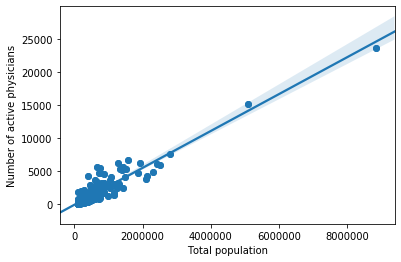

In [42]:
plt.scatter(cdi["Total population"], cdi["Number of active physicians"])
sns.regplot(cdi["Total population"], cdi["Number of active physicians"], data=cdi)

In [43]:
def plot_reg_func(fits, df, x_cols):
    for i in range(len(x_cols)):
        plt.scatter(df[x_cols[i]], df["Number of active physicians"])
        sns.regplot(df[x_cols[i]], df["Number of active physicians"], data=df)

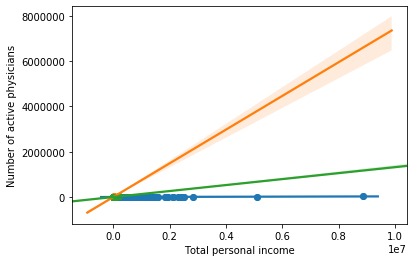

In [44]:
plot_reg_func(fits=lm_fits, df=cdi, x_cols=x_cols)

In [45]:
def mse_loop(fits, df, x_cols):
    for i in range(len(x_cols)):
        X = sm.add_constant(df[x_cols[i]])
        yHat = fits[i].predict(X)
        resids = (df["Number of active physicians"]-yHat)
        SSE = (np.sum(np.square(resids)))
        df_resids = (df.shape[0]-2)
        MSE = (SSE/df_resids)
        print("MSE for %s: "%x_cols[i])
        print(MSE)

In [46]:
mse_loop(fits=lm_fits, df=cdi, x_cols=x_cols)

MSE for Total population: 
372203.5049168834
MSE for Number of hospital beds: 
310191.8835402966
MSE for Total personal income: 
324539.39367646945


**Solution 4** is very similar to 3 and **Solution 5** is also SLR example.

In [ ]:
lm_fits[1].rsquared